In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Diferencias divididas
La derivada en un punto $x_0$ de una función analítica $f(x)$ es

$$f'(x)\Bigg|_{x=x_0}=\lim_{x\rightarrow x_0}\dfrac{f(x)-f(x_0)}{x-x_0}$$

Cuando la función está en forma tabular

<table class="egt">
  <tr><td>Puntos </td> <td>$0$</td><td>$1$</td><td>$2$</td><td>$3$</td><td>$\ldots$</td><td>$n$</td></tr>
  <tr><td>$x$</td><td>$x_0$</td><td>$x_1$</td><td>$x_2$</td><td>$x_3$</td><td>$\ldots$</td><td>$x_n$</td></tr>
  <tr><td>$f(x)$</td><td>$f(x_0)$</td><td>$f(x_1)$</td><td>$f(x_2)$</td><td>$f(x_3)$</td><td>$\ldots$</td><td>$f(x_n)$</td></tr>
</table>

La derivada se puede aproximar en $x$, de la forma siguiente

$$f'(x)	\approx \dfrac{f(x_1)-f(x_0)}{x_1-x_0},\, x_0 < x < x_1$$

donde 

$$\dfrac{f(x_1)-f(x_0)}{x_1-x_0}=f[x_0,x_1]$$

se le conoce como la primera diferencia dividida de $f(x)$ respecto a los puntos $x_0$ y $x_1$.



<img src="https://drive.google.com/uc?id=1ByM3PIYM0YsHF4Xs06UnmXeV_1WQK-uS&export=download" width="100%">

**Ejemplo**: Elaborar una tabla de diferencias divididas a partir de los siguientes datos tabulados obtenidos de un polinomio.

|**Puntos**| $0$ | $1$ | $2$ | $3$ | $4$ | $5$ |
|---       | --- | --- | --- | --- | --- | --- |
|$x$       |$-2$ |$-1$ |$0$  |$2$  |$3$  |$6$  |
|$f(x)$    |$-18$|$-5$ |$-2$ |$-2$ |$7$  |$142$|

> **Primera diferencia divididas**
>> **Puntos 0, 1 y 2**

$$\begin{align*}
f[x_0,x_1] &= \dfrac{-5-(-18)}{-1-(-2)} = 13\\
f[x_1,x_2] &= \dfrac{-2-(-5)}{0-(-1)} = 3\\
\end{align*}$$

> **Segunda diferencia divididas**
>> **Puntos 0, 1 y 2**

$$f[x_0,x_1,x_2] = \dfrac{3-13}{0-(-2)} = -5$$

<img src="https://drive.google.com/uc?id=1eK291eC-SQoVGgCtEjaPfN4O8V7f6gBp&export=download" width="80%">

In [ ]:
def dif_div(x, y):
    '''
    Calcula la tabla de diferencias divididas
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # La primer columna es y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

x = np.array([-2,-1, 0, 2, 3, 6]) 
fx = np.array([-18,-5, -2, -2, 7, 142]) 

dif_div(x,fx)


array([[-18.,  13.,  -5.,   1.,   0.,   0.],
       [ -5.,   3.,  -1.,   1.,   0.,   0.],
       [ -2.,   0.,   3.,   1.,   0.,   0.],
       [ -2.,   9.,   9.,   0.,   0.,   0.],
       [  7.,  45.,   0.,   0.,   0.,   0.],
       [142.,   0.,   0.,   0.,   0.,   0.]])

# Polinomios de Newton 

Considere nuevamente que se tiene una función (datos tabulados) en forma tabular:

<table class="egt">
  <tr><td>Puntos </td> <td>$0$</td><td>$1$</td><td>$2$</td><td>$3$</td><td>$\ldots$</td><td>$n$</td></tr>
  <tr><td>$x$</td><td>$x_0$</td><td>$x_1$</td><td>$x_2$</td><td>$x_3$</td><td>$\ldots$</td><td>$x_n$</td></tr>
  <tr><td>$f(x)$</td><td>$[x_0]$</td><td>$[x_1]$</td><td>$[x_2]$</td><td>$[x_3]$</td><td>$\ldots$</td><td>$[x_n]$</td></tr>
</table>


y que se desea aproximar los datos a un polinomio $p(x)$ de primer grado que pasa por los puntos $0$ y $1$. Dicho polonomio se puede escribir de la forma:

$$p(x) = a_0 + a_1\,(x - x0)$$

donde $x_0$ es la abscisa del punto $0$ y $a_0$ y $a_1$ son parámetros que se tienen que determinar.

> Para encontrar $a_0$ se considera que $x = x_0$, por lo que:

$$a_0 = p(x_0) = f[x_0]$$

> Para encontrar $a_1$ se considera que $x = x_1$:

$$a_1 = \dfrac{f[x_1] - f[x_0]}{(x_1 - x_0)}$$

> donde a $\dfrac{f[x_1] - f[x_0]}{(x_1 - x_0)} = f[x_0,x_1]$  se le conoce como primera diferencia dividida, por lo que el polinomio de primer grado queda en términos de diferencias divididas.

$$p(x) = f[x_0] + (x - x_0)\,f[x_0,x_1]$$

Ahora considere que por los puntos $0$, $1$ y $2$ pasa un _polinomio de segundo grado_ $p_2(x)$ de la forma:

$$p_2(x) = a_0 + a_1\,(x - x0) + a_2\,(x - x_0)\,(x - x_1)$$

donde $x_0$ y $x_1$ son las abscisas de los puntos $0$ y $1$ y $a_0$, $a_1$ y $a_2$ son parámetros a determinar:

> Para encontrar $a_0$ se considera que $x = x_0$, por lo que:

$$a_0 = p_2(x_0) = f[x_0]$$

> Para encontrar $a_1$ se considera que $x = x_1$, por lo que:

$$a_1 =\dfrac{f[x_1] - f[x_0]}{(x_1 - x_0)} = f[x_0,x_1]$$

> Para encontrar $a_2$ se considera que $x = x_2$, por lo que:

$$a_2 =\dfrac{\dfrac{f[x_2] - f[x_1]}{(x_2 - x_1)} - \dfrac{f[x_1] - f[x_0]}{(x_1 - x_0)}}{x_2 - x_0} = f[x_0,x_1,x_2]$$

>> a $f[x_0,x_1,x_2]$ se le conoce como segunda diferencia dividida respecto a $x_0,\,x_1$ y $x_2$.

Sustituyendo en $p_2(x)$ los valores de $a_0,\,a_1$ y $a_2$ se obtiene:

$$p_2(x) = f[x_0] + (x - x_0)\,f[x_0,x_1] + (x - x_0)\,(x - x_1)\,f[x_0,x_1,x_2]$$


**Generalizando**

Considerando que por todos los puntos (datos tabulados) $0,\, 1,\, 2,\,\ldots, n$ pasa un polinomio de grado $n$ $(p_n(x))$ de la forma:

$$p_n(x) = a_0 + a_1\,(x - x_0) + a_2\,(x - x_0)\,(x - x_1) + \ldots + a_n\,(x - x_0)(x - x_1)\ldots(x - x_{n-1})$$

cuyos coeficientes están en términos de diferencias divididas (Ver Tabla de Diferencias divididas):

$$\begin{align*} 
a_0 &= f[x_0]\\
a_1 &= f[x_0,x_1]\\
a_2 &= f[x_0,x_1,x_2]\\
\vdots \\
a_n &= f[x_0,x_1,x_2,\ldots,x_n]
\end{align*}$$

La aproximación polinomial de Newton se puede expresar en  forma resumida como

$$p_n(x) = \sum_{k=0}^{n}a_k\prod_{i=0}^{k-1}(x-x_i)$$



**Ejemplo** Elabore una aproximación polinomio de Newton para los datos tabulados de la presión de vapor de la acetona e interpole la temperatura para una presión de 2 atm.

|**Puntos**| 0  | 1    | 2    | 3    |
|---       |--- |---   |---   |---   |
|$T(^oC)$   |56.5| 113.0| 181.0| 214.5|
|$P(atm)$  | 1  | 5    | 20   | 40   |


$$p_3(x) = 56.5 + 14.125(x-1) - 0.50482(x-1)(x-5)+0.01085(x-1)(x-5)(x-20)$$

In [ ]:
T = np.array([56.5,113.0,181.0,214.5])
P = np.array([1.0,5.0,20.0,40.0])
Tabla_Dif_Div = dif_div(P,T)
Tabla_Dif_Div


array([[ 5.65000000e+01,  1.41250000e+01, -5.04824561e-01,
         1.08502024e-02],
       [ 1.13000000e+02,  4.53333333e+00, -8.16666667e-02,
         0.00000000e+00],
       [ 1.81000000e+02,  1.67500000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.14500000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [ ]:
coeficientes = Tabla_Dif_Div[0, :]
coeficientes

array([ 5.65000000e+01,  1.41250000e+01, -5.04824561e-01,  1.08502024e-02])

In [ ]:
TPdd = np.poly1d(coeficientes[::-1])

In [ ]:
# ¡¡Ojo!!
TPdd(2)

82.81750337381916

In [ ]:
p3 = lambda x: 56.5 + 14.125*(x-1) - 0.50482*(x-1)*(x-5) + 0.01085*(x-1)*(x-5)*(x-20)  
p3(2)

72.72536

In [ ]:
print(np.poly1d(TPdd.coefficients))

         3          2
0.01085 x - 0.5048 x + 14.12 x + 56.5


In [ ]:
def newton_poly(coef, x_data, x):
    '''
    Evalua el polinomo en x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

In [ ]:
newton_poly(coeficientes,P,np.linspace(1.0,2.0,10,endpoint="True"))

array([56.5       , 58.37613641, 60.23373547, 62.07288649, 63.89367877,
       65.69620161, 67.48054431, 69.24679618, 70.99504651, 72.72538462])

In [ ]:

Tdd = newton_poly(coeficientes,P,np.linspace(1.0,40, endpoint="True"))

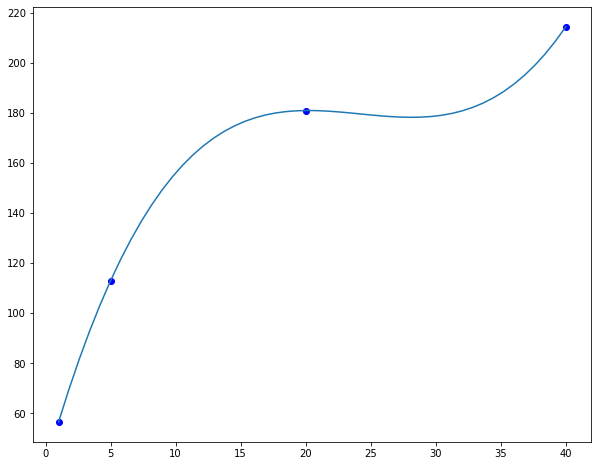

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(P, T, 'bo')
plt.plot(np.linspace(1.0,40, endpoint="True"), Tdd)
plt.show()

# Polinomios de Newton en diferencias finitas

Cuando la distancia, $h$, entre dos argumentos consecutivos cualesquiera es la misma a lo largo de la tabla, el polinomio de Newton en diferencias divididas puede expresarse de manera más sencilla. 

Para este propósito se introduce un nuevo parámetro $s$, definido como 

$$x = x_0 + sh$$

con el cual se expresa el producto

 $$\prod_{i=0}^{k-1}(x-x_i)$$

de la expresión para la aproximación polinomial de Newton en términos de $s$ y $h$

$$\begin{align*}
x_1-x_0 &= h\\
x_2-x_0 &= 2h\\
\vdots\\
x_i-x_0 &= ih
\end{align*}$$

Restando $x_i$ en ambos lados de $x = x0 + sh$, se tiene

$$\begin{align*}
x-x_i &= x_0-x_i + sh\\
x-x_i &= -ih+sh\\
x-x_i &= h(s-i)
\end{align*}$$

> Si $i=1$

$$x-x_1 = h(s-1)$$

> Si $i=2$

$$x-x_2 = h(s-2)$$

Sustituyendo $(x-x_i)$ por $h(s-i)$ en la aproximación polinomial de Newton, se tiene

$$\begin{align*}
p(x) = p_n(x_0 + sh) &= f[x_0] + hsf[x_0,x_1] + h^2s(s-1)f[x_0,x_1,x_2]\\
&+h^3s(s-1)(s-2)f[x_0,x_1,x_2,x_3] + \ldots\\
&+ h^ns(s-1)(s-2)\ldots(s-(n-1))f[x_0,x_1,\ldots,x_n]
\end{align*}$$

En forma compacta

$$p_n(x)=\sum_{k=0}^n a_k h^k \prod_{i=0}^{k-1}(s-i)$$

Introduciendo el operador lineal en diferencias hacia adelante, $\Delta$, la primera diferencia hacia adelante queda de la forma siguiente:

$$\Delta f(x) = f(x+h)-f(x)$$

La segunda diferencia hacia adelante 

$$\begin{align*}
\Delta(\Delta f(x))=\Delta^2f(x) &= \Delta(f(x+h)-f(x))\\
&= \Delta f(x+h)-\Delta f(x)\\
&= f(x+h+h)-f(x+h)-f(x+h)+f(x)\\
&= f(x+2h)-2f(x+h)+f(x)
\end{align*}$$

Generalizando, las diferencias hacia adelante de orden superior se generan como sigue

$$\Delta^i f(x)= \Delta (\Delta^{i-1}f(x))$$

Al aplicar el operador $\Delta$ al primer valor funcional $f[x_0]$, se tiene

$$\Delta f(x_0) = f[x_1]-f[x_0] = hf[x_0,x_1]$$

y resolviendo para $f[x_0,x_1]$

$$f[x_0,x_1] = \dfrac{1}{h}\Delta f(x_0)$$

Del mismo modo, se tiene que para $f[x_0,x_1,x_2]$

$$f[x_0,x_1,x_2] = \dfrac{1}{2h^2}\Delta^2 f(x_0)$$

Generalizando para $f[x_0,x_1,\ldots,x_n]$


$$f[x_0,x_1,\ldots,x_n] = \dfrac{1}{n!h^n}\Delta^n f(x_0)$$

Al sustituir $f[x_0,x_1,\ldots,x_i]$ en 

$$\begin{align*}
p(x) = p_n(x_0 + sh) &= f[x_0] + hsf[x_0,x_1] + h^2s(s-1)f[x_0,x_1,x_2]\\
&+h^3s(s-1)(s-2)f[x_0,x_1,x_2,x_3] + \ldots\\
&+ h^ns(s-1)(s-2)\ldots(s-(n-1))f[x_0,x_1,\ldots,x_n]
\end{align*}$$

queda el polinomio de Newton en diferencias hacia adelante

$$\begin{align*}
p(x) = p_n(x_0 + sh) &= f[x_0] + s\Delta f[x_0] + \dfrac{s(s-1)}{2!}\Delta^2 f[x_0]+\\
&\dfrac{s(s-1)(s-2)}{3!}\Delta^3 f[x_0] + \ldots\\
&+ \dfrac{s(s-1)(s-2)\ldots(s(n-1))}{n!}\Delta^n f[x_0]
\end{align*}$$


**Ejemplo** La siguiente tabla proporciona las presiones de vapor en $\mathrm{lb/plg^2}$ a diferentes temperaturas $(^oF)$ para el 1-3 butadieno.

<table class="egt">
  <tr><td>Puntos </td> <td>$0$</td><td>$1$</td><td>$2$</td><td>$3$</td><td>$4$</td><td>$5$</td></tr>
  <tr><td>$T$</td><td>$50$</td><td>$60$</td><td>$70$</td><td>$80$</td><td>$90$</td><td>$100$</td></tr>
  <tr><td>$P$</td><td>$24.94$</td><td>$30.11$</td><td>$36.05$</td><td>$42.84$</td><td>$50.57$</td><td>$59.30$</td></tr>
</table>

Aproxime la función tabulada por el polinomio de Newton en diferencias hacia adelante e interpole la presión a $T=64^oF$.

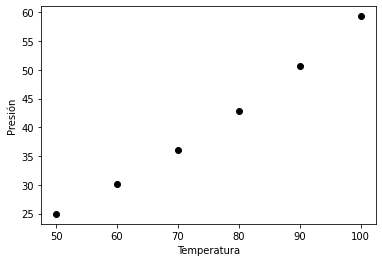

In [ ]:
import matplotlib.pyplot as plt
Temperatura = [50, 60, 70, 80, 90, 100]
Presion = [24.94, 30.11, 36.05, 42.84, 50.57, 59.30]
plt.plot(Temperatura,Presion, "ko")
plt.xlabel("Temperatura")
plt.ylabel("Presión")
plt.show()

> **Paso 1**: Calcular $s$, con $h = 10$

$$x = x_0 + sh\,\therefore\, s = \dfrac{x-x_0}{h} = \dfrac{64-50}{10}=1.4$$

> **Paso 2**: Calcular $\Delta f[x_i]$

>> _Punto entre 0 y 1_

$$\Delta f[x_0] = (30.11-24.94)=5.17$$

>> _Punto entre 1 y 2_

$$\Delta f[x_1] = 5.94$$

>> _Punto entre 2 y 3_

$$\Delta f[x_2] = 6.79$$

>> _Punto entre 3 y 4_

$$\Delta f[x_3] = 7.73$$

>> _Punto entre 4 y 5_

$$\Delta f[x_4] = 8.73$$

> **Paso 3**: Calcular $\Delta^2 f[x_i]$

>> _Punto entre 0, 1 y 2_

$$\Delta^2 f[x_0] = (5.94-5.17)=0.77$$

>> _Punto entre 1, 2 y 3_

$$\Delta^2 f[x_1] = 0.85$$

>> _Punto entre 2, 3 y 4_

$$\Delta^2 f[x_2] = 0.94$$

>> _Punto entre 3, 4 y 5_

$$\Delta^2 f[x_3] = 1.00$$

> **Paso 4**: Calcular $\Delta^3 f[x_i]$

$$\Delta^3 f[x_0] = (0.85-0.77)=0.08$$

$$\Delta^3 f[x_1] = 0.09$$

$$\Delta^3 f[x_2] = 0.06$$

> **Paso 4**: Calcular $\Delta^4 f[x_i]$

$$\Delta^4 f[x_0] = (0.09-0.08)=0.01$$

$$\Delta^4 f[x_1] = -0.03$$





<img src="https://drive.google.com/uc?id=1u8s49kwh-tQASFg42j4yLDm2slB98XYT&export=download" width="100%">

In [ ]:
import numpy as np
xi = np.array([50, 60, 70, 80, 90, 100])
fxi = np.array([24.94, 30.11, 36.05, 42.84, 50.57, 59.30])
N = np.shape(xi)[0] # Se estrae el tamaño de la lista de datos
    
TDF = np.zeros((N,N))    # Arreglo donde se almacenará la Tabla de diferencias finitas
TDF[:,0] = fxi    # En la primer columna se almacenan los datos de fxi

for j in range (1,N):
  for i in range (N-j):
    TDF[i,j] = TDF[i+1,j-1]-TDF[i,j-1]

TDF

array([[ 2.494e+01,  5.170e+00,  7.700e-01,  8.000e-02,  1.000e-02,
        -4.000e-02],
       [ 3.011e+01,  5.940e+00,  8.500e-01,  9.000e-02, -3.000e-02,
         0.000e+00],
       [ 3.605e+01,  6.790e+00,  9.400e-01,  6.000e-02,  0.000e+00,
         0.000e+00],
       [ 4.284e+01,  7.730e+00,  1.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 5.057e+01,  8.730e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 5.930e+01,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00]])

In [ ]:
import pandas as pd
df_TDF = pd.DataFrame(data=TDF, columns=["fxi", "Dfxi","D^2fxi","D^3fxi","D^4fxi","D^5fxi"])
df_TDF

,fxi,Dfxi,D^2fxi,D^3fxi,D^4fxi,D^5fxi
0,24.94,5.17,0.77,0.08,0.01,-0.04
1,30.11,5.94,0.85,0.09,-0.03,0.00
2,36.05,6.79,0.94,0.06,0.00,0.00
3,42.84,7.73,1.00,0.00,0.00,0.00
4,50.57,8.73,0.00,0.00,0.00,0.00
5,59.30,0.00,0.00,0.00,0.00,0.00


+ Aproximando a un polinomio de primer grado, $n=1$

$$\begin{align*}
p(x) = p_n(x_0 + sh) &= f[x_0] + s\Delta f[x_0] + \dfrac{s(s-1)}{2!}\Delta^2 f[x_0]+\\
&\dfrac{s(s-1)(s-2)}{3!}\Delta^3 f[x_0] + \ldots\\
&+ \dfrac{s(s-1)(s-2)\ldots(s(s-(n-1)))}{n!}\Delta^n f[x_0]
\end{align*}$$

> sólo se consideran los dos primeros términos de la ecuación anterior, por lo tanto

$$p(x) = f[x_0] + s\Delta f[x_0] = 24.94 + 1.4(5.17) = 32.18$$

+ Aproximando a un polinomio de segundo grado, $n=2$

$$p_2(x) = f[x_0] + s\Delta f[x_0] + \dfrac{s(s-1)}{2!}\Delta^2f[x_0]$$

> con $s = \dfrac{x-x_0}{h} = \dfrac{64-50}{10}=1.4$

$$p_2(64) = 24.94 + (1.4)(5.17) + \dfrac{1.4(1.4-1)}{2!}0.77 = 32.39$$
